Import Python Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Python Libraries

In [4]:
data = pd.read_csv("used_cars_data.csv")

Analyzing the Data

In [5]:
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
data.sample(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4397,4397,Hyundai Grand i10 Sportz,Coimbatore,2017,47774,Petrol,Manual,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.04
4707,4707,Hyundai Grand i10 AT Asta,Hyderabad,2016,21000,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.20
6653,6653,Volvo S60 D5 Kinetic,Hyderabad,2011,70000,Diesel,Automatic,First,13.2 kmpl,2400 CC,215 bhp,5.0,NaN,NaN
6718,6718,BMW 3 Series 320d Sport,Coimbatore,2017,41078,Diesel,Automatic,First,22.69 kmpl,1995 CC,190 bhp,5.0,NaN,NaN
1921,1921,Mahindra XUV500 W8 4WD,Pune,2014,81000,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,NaN,9.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


Check for Duplication

In [8]:
data.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

Missing Values Calculation

In [9]:
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

Data Reduction

In [10]:
data = data.drop(['S.No.'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


Creating Features

In [11]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,11


 splitting the name and introduce new variables “Brand” and “Model”

In [12]:
data['Brand'] = data.Name.str.split().str.get(0)

In [13]:
data['Model'] = data.Name.str.split().str.get(1) + data.Name.str.split().str.get(2)

In [14]:
data[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Volkswagen,PoloGT


In [15]:
print(data.Brand.unique())
print(data.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']
33


In [16]:
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,27.00,10,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.50,12,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,NaN,23.00,7,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,55.76,6,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,44.28 Lakh,35.67,7,Mini,CooperConvertible


In [25]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

EDA

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.000000,2011.000000,2014.000000,2016.000000,2.019000e+03
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.000000,34000.000000,53416.000000,73000.000000,6.500000e+06
Seats,7200.0,5.279722,0.811660,0.000000,5.000000,5.000000,5.000000,1.000000e+01
Price,6019.0,9.479468,11.187917,0.440000,3.500000,5.640000,9.950000,1.600000e+02
Car_Age,7253.0,10.634634,3.254421,5.000000,8.000000,10.000000,13.000000,2.800000e+01
Kilometers_Driven_log,7253.0,10.760978,0.716327,5.141664,10.434116,10.885866,11.198215,1.568731e+01
Price_log,6019.0,1.825095,0.874059,-0.820981,1.252763,1.729884,2.297573,5.075174e+00


 separate Numerical and categorical variables for easy analysis

In [27]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'New_Price', 'Brand', 'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age', 'Kilometers_Driven_log', 'Price_log']


 EDA Univariate Analysis

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram and  Box Plot for continuous Variables.

Year
Skew : -0.84


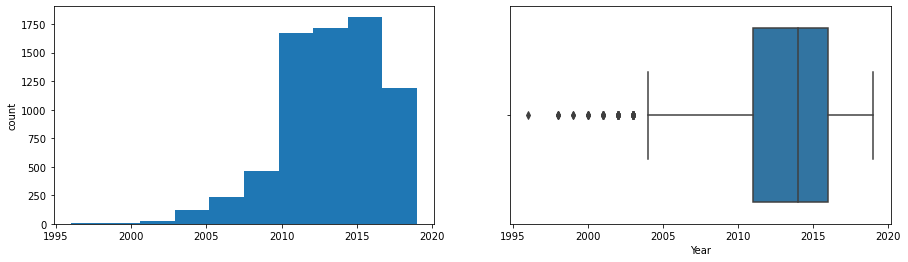

Kilometers_Driven
Skew : 61.58


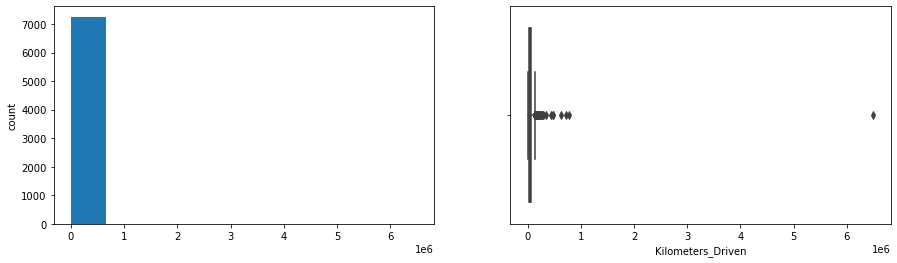

Seats
Skew : 1.9


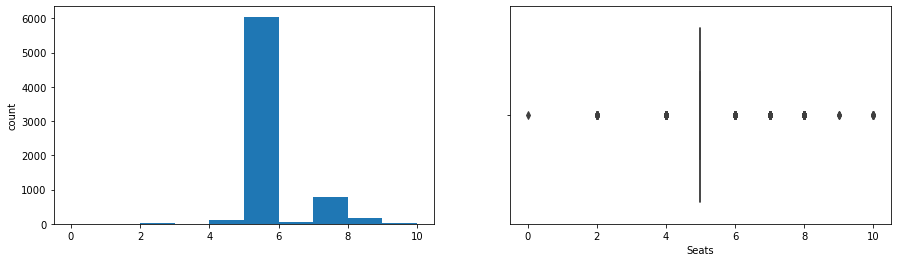

Price
Skew : 3.34


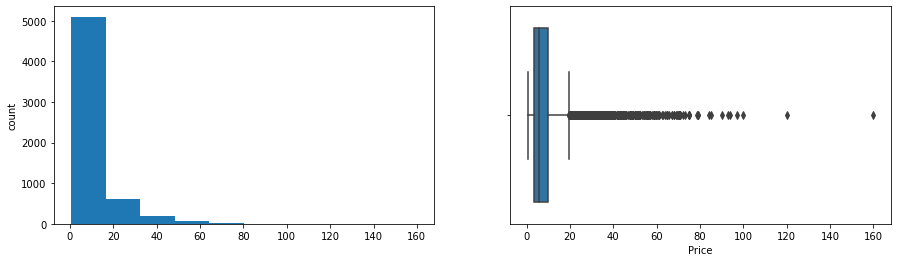

Car_Age
Skew : 0.84


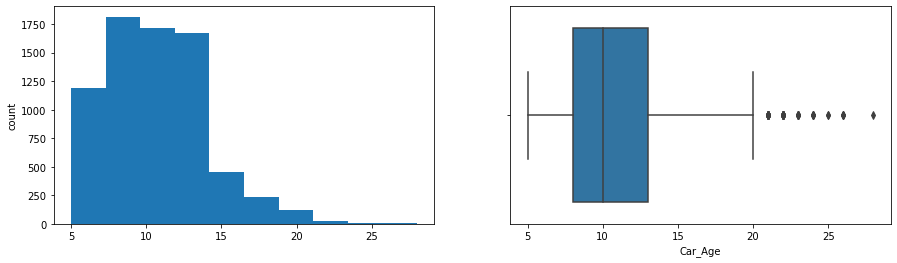

In [20]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [21]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [22]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7253 non-null   object 
 1   Location               7253 non-null   object 
 2   Year                   7253 non-null   int64  
 3   Kilometers_Driven      7253 non-null   int64  
 4   Fuel_Type              7253 non-null   object 
 5   Transmission           7253 non-null   object 
 6   Owner_Type             7253 non-null   object 
 7   Mileage                7251 non-null   object 
 8   Engine                 7207 non-null   object 
 9   Power                  7207 non-null   object 
 10  Seats                  7200 non-null   float64
 11  New_Price              1006 non-null   object 
 12  Price                  6019 non-null   float64
 13  Car_Age                7253 non-null   int64  
 14  Brand                  7253 non-null   object 
 15  Mode

C:\Users\mmhpu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


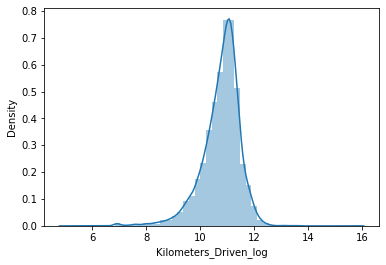

In [29]:
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

EDA Bivariate Analysis

<Figure size 936x1224 with 0 Axes>

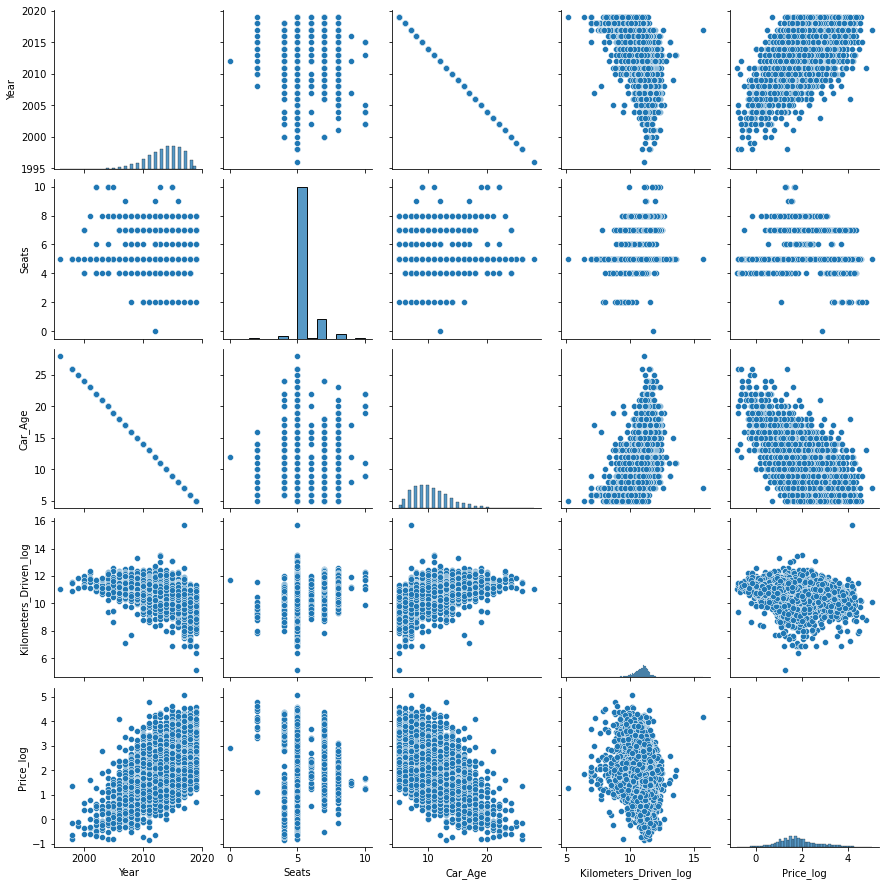

In [24]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

Pair Plot provides below insights:

The variable Year has a positive correlation with price and mileage
A year has a Negative correlation with kilometers-Driven
Mileage is negatively correlated with Power
As power increases, mileage decreases
Car with recent make is higher at prices. As the age of the car increases price decreases
Engine and Power increase, and the price of the car increases